In [2]:
#Read from CSV file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('SpelunkyClassic.csv', sep = ',', encoding = 'latin-1')
del df['URL']

print(df)


      Run ID   User ID        User Name           Category  Hours  Minutes  \
0   z13do29m  5j5qkw6j        BarryMode               Any%      0      2.0   
1   m3dqn9dz  qxkge2mj  GruntingCrunchy               Any%      0      6.0   
2   zx4gvw8y  zx7gmz0x               ix               Any%      0      5.0   
3   y43o30dz  0jmzenex       saturnin55               Any%      0      4.0   
4   z11kr7gz  98r1vrgj      MikeIsMyIke               Any%      0      3.0   
5   mr8x748y  qj26rvox          grooomp               Any%      0      3.0   
6   z51g20jm  68w7o9zx    ShinGraywords               Any%      0      3.0   
7   m3oj3ngm  48glr97x    TheNitromeFan               Any%      0      8.0   
8   y43lq22z  98r1vrgj      MikeIsMyIke               Any%      0      3.0   
9   zq3q7g1y  dx3dv2e8        MNCmascot               Any%      0     16.0   
10  y2qwpv7y  qxkge2mj  GruntingCrunchy               Any%      0      4.0   
11  y92e9n2z  98rl1q68         Kirby703               Any%      

In [3]:
#Clean data

df = df.loc[(df['Category'] == 'Any%') & (df['Verified'] == 'verified') & (df['Date'].notnull())]
df = df.rename({'User Name': 'userName'}, axis=1)
df = df.sort_values(["Date"])
del df['Verified']
del df['Run ID']
del df['User ID']

totalSeconds = []

for x in range(len(df)):
    seconds = 0.0
    seconds += (df.iloc[x].Hours * 3600) + (df.iloc[x].Minutes * 60) + (df.iloc[x].Seconds)
    totalSeconds.append(seconds)

df['TimeSeconds'] = totalSeconds
df = df[['userName', 'Category', 'Hours', 'Minutes', 'Seconds', 'TimeSeconds', 'Platform Name', 'Date']]

print(df)

           userName Category  Hours  Minutes  Seconds  TimeSeconds  \
0         BarryMode     Any%      0      2.0     30.0        150.0   
1   GruntingCrunchy     Any%      0      6.0     43.0        403.0   
2                ix     Any%      0      5.0     44.0        344.0   
3        saturnin55     Any%      0      4.0     46.0        286.0   
4       MikeIsMyIke     Any%      0      3.0     13.0        193.0   
10  GruntingCrunchy     Any%      0      4.0     38.0        278.0   
9         MNCmascot     Any%      0     16.0     45.0       1005.0   
8       MikeIsMyIke     Any%      0      3.0      7.0        187.0   
6     ShinGraywords     Any%      0      3.0     59.0        239.0   
5           grooomp     Any%      0      3.0     19.0        199.0   
7     TheNitromeFan     Any%      0      8.0     56.0        536.0   
11         Kirby703     Any%      0     10.0     16.0        616.0   
12         Kirby703     Any%      0      6.0     38.0        398.0   
13              baq 

    userName Category  Hours  Minutes  Seconds  TimeSeconds Platform Name  \
0  BarryMode     Any%      0      2.0     30.0        150.0            PC   

         Date  
0  2013-04-13  
This world record was the first to be uploaded, no others that came after beat it's time.


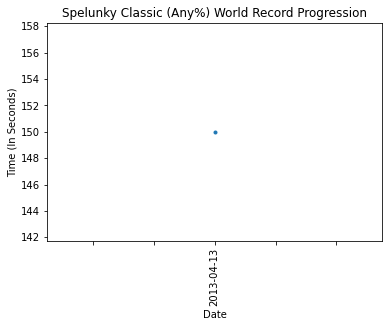

In [4]:
#Find World Record Progression

worldRecords = []
minTime = df.iloc[0].TimeSeconds

for x in range(len(df)):
    if df.iloc[x].TimeSeconds <= minTime:
        worldRecords.append(df.iloc[x])
        minTime = df.iloc[x].TimeSeconds

wrdf = pd.DataFrame(worldRecords)
print(wrdf)

wrdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spelunky Classic (Any%) World Record Progression")
print("This world record was the first to be uploaded, no others that came after beat it's time.")

Number of improvements: 8
Number of same times: 12
Total runners: 20
           UserName  Fastest   First  PercentImprovement
0         BarryMode    150.0   150.0           -0.000000
16      Glassextiel    394.0   394.0           -0.000000
15          twiggle    364.0   364.0           -0.000000
14               ix    344.0   344.0           -0.000000
13     PastryPerson    289.0   289.0           -0.000000
12       saturnin55    286.0   286.0           -0.000000
10    ShinGraywords    239.0   239.0           -0.000000
18           Yandie    582.0   582.0           -0.000000
9               MCH    230.0   230.0           -0.000000
4            diedai    201.0   201.0           -0.000000
3           grooomp    199.0   199.0           -0.000000
19        MNCmascot   1005.0  1005.0           -0.000000
2       MikeIsMyIke    187.0   193.0            3.108808
7         amike1913    209.0   251.0           16.733068
11          Mikulus    262.0   331.0           20.845921
1         bronxtaco

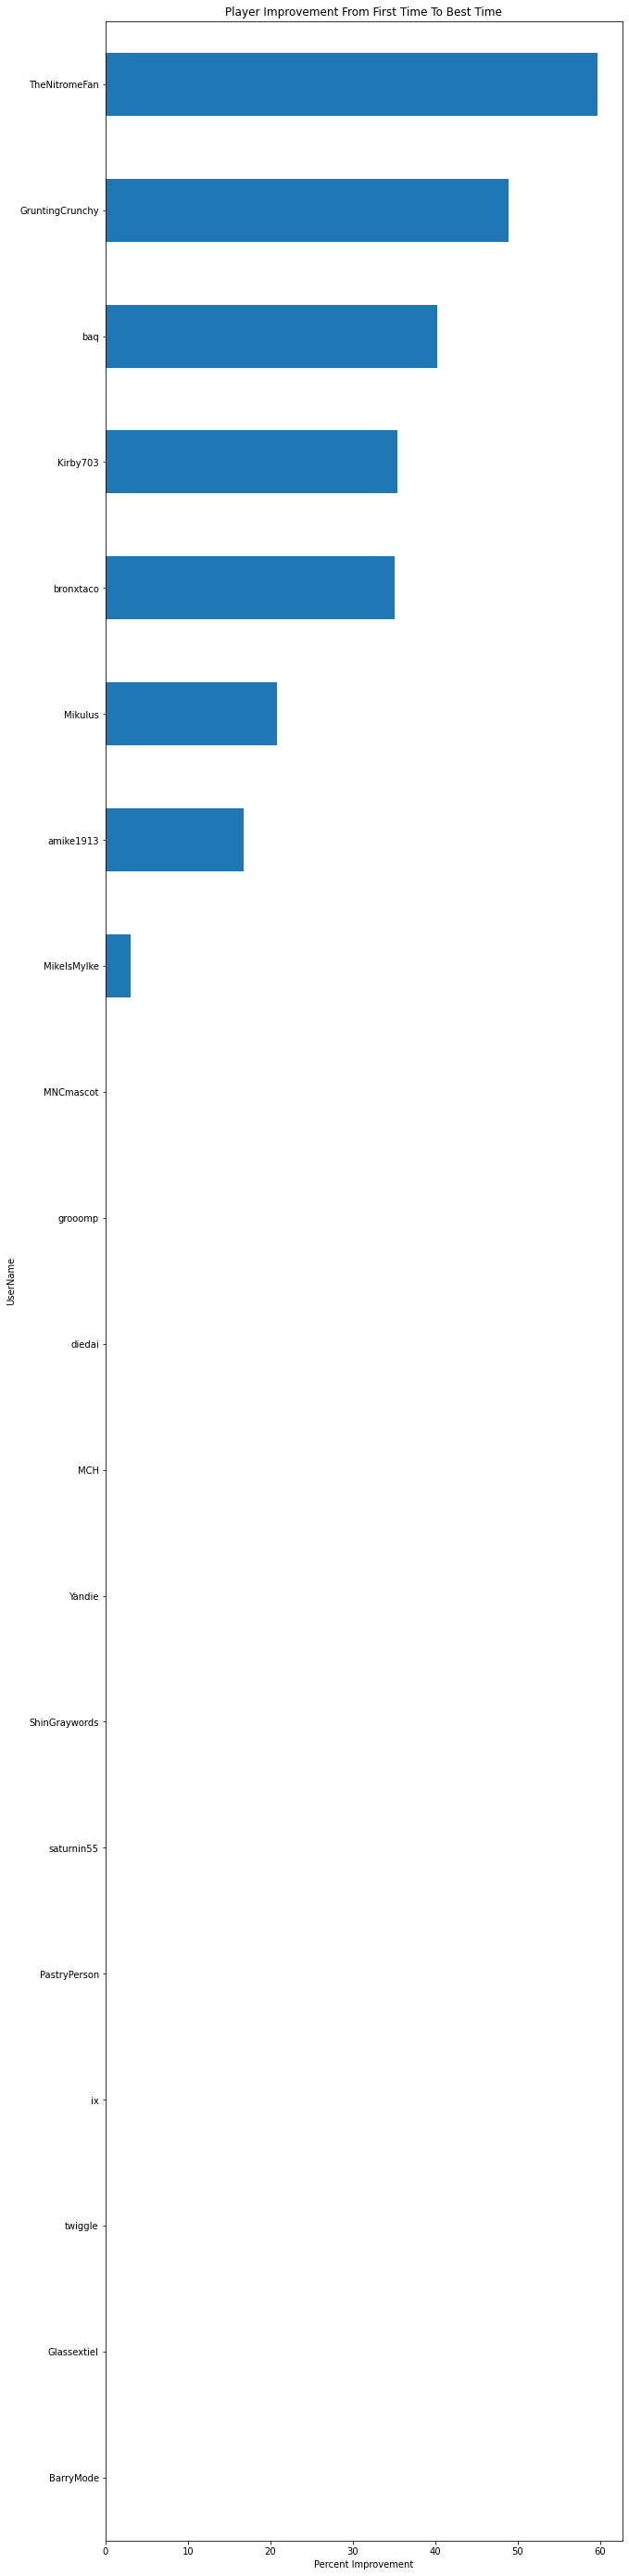

In [5]:
#Print Leadboard

rankingsFirst = df.sort_values(["Hours", "Minutes", "Seconds"])
rankingsFirst = rankingsFirst.drop_duplicates(subset = "userName")

rankingsLast = df.sort_values(["Date"])
rankingsLast = rankingsLast.drop_duplicates(subset = "userName")

quad = []

for x in range (len(rankingsFirst)):
    for y in range (len(rankingsLast)):
        if rankingsFirst.iloc[x].userName == rankingsLast.iloc[y].userName:
            fastest = rankingsFirst.iloc[x].TimeSeconds
            first = rankingsLast.iloc[y].TimeSeconds
            increase = (fastest - first) / first * 100
            increase = -increase
            quad.append((rankingsFirst.iloc[x].userName, fastest, first, increase))

count = 0
same = 0

for x in quad:
    if (x[1] < x[2]):
        count += 1
    elif (x[1] == x[2]):
        same += 1;
        
print("Number of improvements: " + str(count))
print("Number of same times: " + str(same))
print("Total runners: " + str(len(quad)))

improvementdf =  pd.DataFrame(quad, columns = ['UserName', 'Fastest', 'First', 'PercentImprovement'])
improvementdf = improvementdf.sort_values(["PercentImprovement"])
improvementdf.plot(kind = "barh", x = "UserName", y = "PercentImprovement", figsize = (10,50), legend = False)
plt.title("Player Improvement From First Time To Best Time")
plt.xlabel("Percent Improvement")
print(improvementdf)

In [5]:
#Print Leadboard

rankingsFirst = df.sort_values(["Hours", "Minutes", "Seconds"])
rankingsFirst = rankingsFirst.drop_duplicates(subset = "userName")

print("Fastest Times: ")
print (rankingsFirst)

rankingsLast = df.sort_values(["Date"])
rankingsLast = rankingsLast.drop_duplicates(subset = "userName")
print("First Entires: ")
print(rankingsLast)

#TODO: Make array of tuples with (userName, timesecondsFastest, timesecondsFirst)

Fastest Times: 
           userName Category  Hours  Minutes  Seconds  TimeSeconds  \
0         BarryMode     Any%      0      2.0     30.0        150.0   
34        bronxtaco     Any%      0      3.0      5.0        185.0   
8       MikeIsMyIke     Any%      0      3.0      7.0        187.0   
5           grooomp     Any%      0      3.0     19.0        199.0   
50           diedai     Any%      0      3.0     21.0        201.0   
20              baq     Any%      0      3.0     22.0        202.0   
36  GruntingCrunchy     Any%      0      3.0     26.0        206.0   
46        amike1913     Any%      0      3.0     29.0        209.0   
49    TheNitromeFan     Any%      0      3.0     36.0        216.0   
18              MCH     Any%      0      3.0     50.0        230.0   
6     ShinGraywords     Any%      0      3.0     59.0        239.0   
52          Mikulus     Any%      0      4.0     22.0        262.0   
3        saturnin55     Any%      0      4.0     46.0        286.0   
53  

    userName Category  Hours  Minutes  Seconds  TimeSeconds Platform Name  \
0  BarryMode     Any%      0      2.0     30.0        150.0            PC   

         Date  
0  2013-04-13  
     userName Category  Hours  Minutes  Seconds  TimeSeconds Platform Name  \
15  bronxtaco     Any%      0      4.0     45.0        285.0            PC   
16  bronxtaco     Any%      0      3.0     52.0        232.0            PC   
19  bronxtaco     Any%      0      3.0     26.0        206.0            PC   
34  bronxtaco     Any%      0      3.0      5.0        185.0            PC   

          Date  
15  2020-07-15  
16  2020-07-15  
19  2020-09-01  
34  2020-09-21  
      userName Category  Hours  Minutes  Seconds  TimeSeconds Platform Name  \
4  MikeIsMyIke     Any%      0      3.0     13.0        193.0            PC   
8  MikeIsMyIke     Any%      0      3.0      7.0        187.0            PC   

         Date  
4  2018-12-28  
8  2019-01-26  
  userName Category  Hours  Minutes  Seconds  TimeS

Text(0.5, 1.0, 'Spelunky Classic (Any%) diedai Progression')

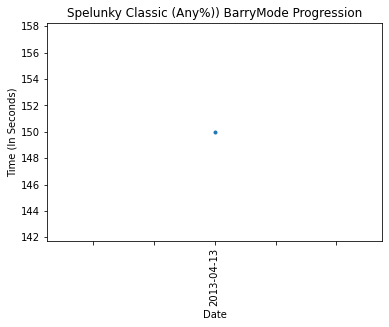

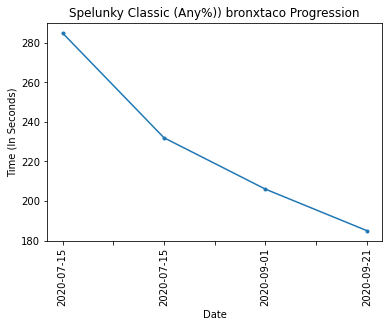

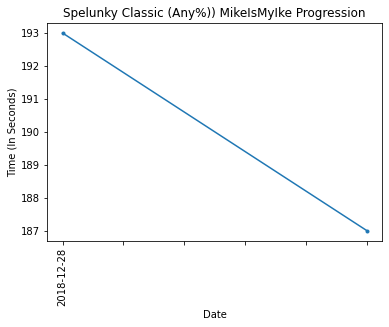

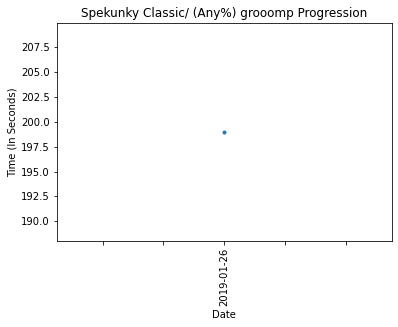

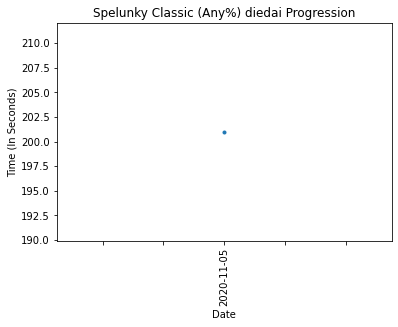

In [6]:
#Graph 5 Fastest Players

wrhdf = df.loc[df['userName'] == 'BarryMode']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spelunky Classic (Any%)) BarryMode Progression")

wrhdf = df.loc[df['userName'] == 'bronxtaco']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spelunky Classic (Any%)) bronxtaco Progression")

wrhdf = df.loc[df['userName'] == 'MikeIsMyIke']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spelunky Classic (Any%)) MikeIsMyIke Progression")

wrhdf = df.loc[df['userName'] == 'grooomp']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spekunky Classic/ (Any%) grooomp Progression")

wrhdf = df.loc[df['userName'] == 'diedai']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spelunky Classic (Any%) diedai Progression")

Text(0.5, 1.0, 'Spelunky Quantity of Runs by Year')

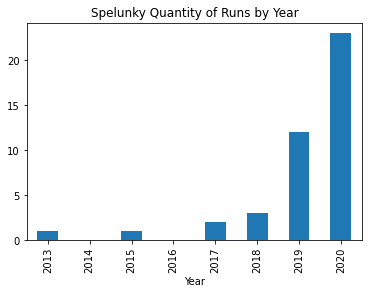

In [7]:
count2013 = np.count_nonzero(df['Date'] < '2014-01-01')
count2014 = np.count_nonzero(df['Date'] < '2015-01-01') - count2013
count2015 = np.count_nonzero(df['Date'] < '2016-01-01') - count2014
count2016 = np.count_nonzero(df['Date'] < '2017-01-01') - count2015
count2017 = np.count_nonzero(df['Date'] < '2018-01-01') - count2016
count2018 = np.count_nonzero(df['Date'] < '2019-01-01') - count2017
count2019 = np.count_nonzero(df['Date'] < '2020-01-01') - count2018
count2020 = np.count_nonzero(df['Date']) - count2019

monthsArray = ([ ['2013', count2013], ['2014', count2014], ['2015', count2015], ['2016', count2016], ['2017', count2017], ['2018', count2018], ['2019', count2019], ['2020', count2020]])
monthsdf = pd.DataFrame(data = monthsArray, columns = ['Year', 'Number of Runs Submitted'])

monthsdf.plot(kind = 'bar', x = 'Year', y='Number of Runs Submitted', legend = False)
plt.title("Spelunky Quantity of Runs by Year")